In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

/home/ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


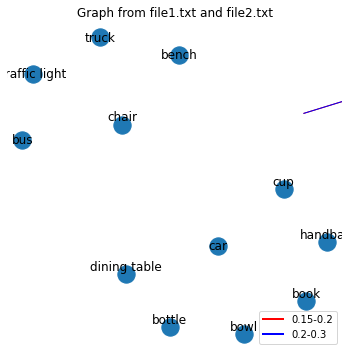

In [34]:
G = nx.Graph()

# Set up different edge colors
colors = {'/home/ubuntu/ssl-optimal-transport/tools/vis/output_0.15-0.2.txt': 'red', '/home/ubuntu/ssl-optimal-transport/tools/vis/output_0.2-0.3.txt': 'blue'}

# Read the files and add edges to the graph with the corresponding color
for filename, color in colors.items():
    with open(filename, 'r') as file:
         for line in file:
                node1, node2 = line.split('-')
                G.add_edge(node1, node2, color=color)

# Create a figure with specified size
plt.figure(figsize=(6, 6))

# Draw nodes
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos)

# Draw edges with corresponding colors
for filename, color in colors.items():
    edges = G.edges(data=True)
    nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=color)

# Draw labels
nx.draw_networkx_labels(G, pos)

# Creating a legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='red', lw=2, label='0.15-0.2'),
                   Line2D([0], [0], color='blue', lw=2, label='0.2-0.3')]
plt.legend(handles=legend_elements, loc='lower right')

# Display the graph
plt.title('Graph from file1.txt and file2.txt')
plt.axis('off')
sns.despine(bottom=True, left=True)  # Remove axis for better aesthetics
plt.show()
